In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/Processed_Data/Final_Dataset_After_Feature_Engineering.csv')

In [3]:
df

,Unnamed: 0,Batting_Team,Bowling_team,City,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
0,111096,Kolkata Knight Riders,Chennai Super Kings,Ranchi,84,64,6,149,6.964286,7.875000,0
1,174836,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,84,47,5,158,6.082192,10.723404,0
2,110826,Mumbai Indians,Kings XI Punjab,Mumbai,161,112,9,169,6.000000,8.625000,1
3,71366,Mumbai Indians,Gujarat Lions,Rajkot,15,11,4,154,7.651376,8.181818,1
4,82490,Kings XI Punjab,Kolkata Knight Riders,Kolkata,22,12,4,165,7.944444,11.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
88489,171670,Kolkata Knight Riders,Chennai Super Kings,Centurion,54,26,7,189,8.617021,12.461538,1
88490,43010,Chennai Super Kings,Sunrisers Hyderabad,Chennai,50,35,8,176,8.894118,8.571429,1
88491,42467,Rajasthan Royals,Kolkata Knight Riders,Kolkata,121,83,9,176,8.918919,8.746988,1
88492,147757,Rajasthan Royals,Chennai Super Kings,Jaipur,144,79,8,197,7.756098,10.936709,0


In [43]:
LogReg=pickle.load(open('LogReg.pkl','rb'))
#Rf=pickle.load(open('Rf.pkl','rb'))
season = input("Enter IPL Season: ")
sel_team = input("Enter a team: ")
batting_team = input("Enter batting team: ")
bowling_team = input("Enter bowling team: ")
selected_city = input("Select Host City: ")
target = int(input("Enter target: "))
score = int(input("Enter current score: "))
overs = int(input("Enter number of overs completed: "))
wickets_out = int(input("Enter number of wickets down: "))
classifier_name = input("Enter classifier name: ")

Enter IPL Season: IPL - 2021
Enter a team: Chennai Super Kings
Enter batting team: Chennai Super Kings
Enter bowling team: Mumbai Indians
Select Host City: Chennai
Enter target: 200
Enter current score: 170
Enter number of overs completed: 14
Enter number of wickets down: 4
Enter classifier name: Logistic Regression


In [44]:
runs_left = target - score
balls_left = 120 - (overs * 6)
wickets_left = 10 - wickets_out
crr = score / overs
rrr = (runs_left * 6) / (balls_left)

input_df=pd.DataFrame({'batting_team':[batting_team],'bowling_team':[bowling_team],
    'city':[selected_city],'runs_left':[runs_left],'balls_left': [balls_left],
    'wickets':[wickets_left],'total_runs_x':[target],'crr':[crr],'rrr':[rrr]},columns=LogReg[0]._df_columns.tolist())
input_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
0,Chennai Super Kings,Mumbai Indians,Chennai,30,36,6,200,12.142857,5.0


In [45]:
if classifier_name=="Logistic Regression":
    result=LogReg.predict_proba(input_df)
elif classifier_name=="Random Forest":
    result=Rf.predict_proba(input_df)
else:
    result=dt_clf.predict_proba(input_df)

(-1.1190681758220504,
 1.1941556784690355,
 -1.1210728788397062,
 1.1652846268243673)

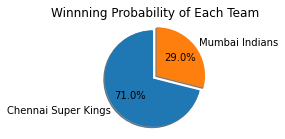

In [46]:
loss=result[0][0]
win=result[0][1]
    # st.header(batting_team + "-" + str(round(win*100)) +'%')
    # st.header(bowling_team + "-" + str(round(loss*100)) +'%')
    

labels = [batting_team,bowling_team]
sizes = [win,loss]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(2,2))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.set_title('Winnning Probability of Each Team')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [47]:
#LogReg[0].get_feature_names()

In [48]:
#LogReg[0].get_params()